In [194]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn.linear_model as LinearRegression

## 3.6.2 Simple Linear Regression

In [182]:
df = pd.read_csv('Boston.csv', index_col=0)
#df.head()
#df.columns

In [151]:
#y=medv, x=lstat 

#from_formula() function follows 'y~x1+x2+x3'
#lm = sm.OLS.from_formula(formula='medv~lstat', data=df)

#we can also import it above as smf directly 
lm = smf.ols(formula='medv~lstat', data=df)
result = lm.fit()

In [152]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        16:16:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#to print out individual values

result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

(0.5441462975864797, 601.6178711098953, 34.55384087938309, -0.9500493537579902)

In [90]:
#confidence intervals (default alpha=0.95)

ci = result.conf_int().rename(columns={0: 'lower', 1: 'upper'})
ci

,lower,upper
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [99]:
#make predictions on 3 datapoints, include ci
new = pd.DataFrame([[1,5],[1,10],[1,15]], columns = ['Intercept', 'lstat'])

def predict(result, data):
    y = result.predict(new)
    ci = result.conf_int().rename(columns={0:'lower', 1:'upper'}) 
    ci = new.dot(ci) #(mxn * nxci)
    new['predictions'] = y
    
    return pd.concat([new, ci], axis=1)

In [100]:
predict(result, new)

,Intercept,lstat,predictions,lower,upper
0,1,5,29.803594,28.317716,31.289472
1,1,10,25.053347,23.186975,26.919720
2,1,15,20.303101,18.056234,22.549967


In [101]:
#residuals 
result.resid.describe()

count    5.060000e+02
mean     2.980488e-15
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

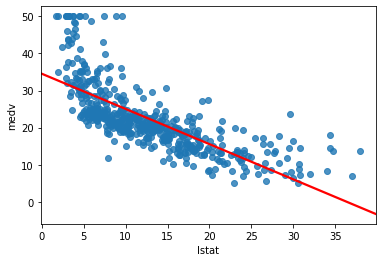

In [103]:
#plot medv and lstat with the least squares regression line using regplot()
#line_kws 'line keywords' to define color of the line 

sns.regplot('lstat', 'medv', df, line_kws = {"color":"r"}, ci=None)

In [117]:
#this is another way of plotting the same thing
#plt.scatter(df.lstat, df.medv)
#X = pd.DataFrame({'lstat': [df.lstat.min(), df.lstat.max()]})
#Y_pred = result.predict(X)
#plt.plot(X, Y_pred, c='red')
#plt.show()

#### Plot the Residuals

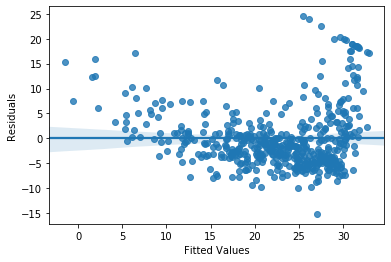

In [132]:
#plot residuals against predicted values 
#sns.regplot(result.fittedvalues, result.resid, fit_reg=False)

#to plot the 2 variables with labels, make define as pandas Series 

pred, resi = pd.Series(result.fittedvalues, name="Fitted Values"),pd.Series(result.resid, name="Residuals")
sns.regplot(pred, resi, fit_reg=False)

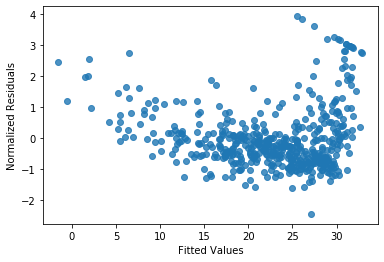

In [131]:
#normalized residuals - result.resid_pearson 

resi_n = pd.Series(result.resid_pearson, name="Normalized Residuals")
sns.regplot(pred, resi_n, fit_reg=False)

#### High Leverage Points

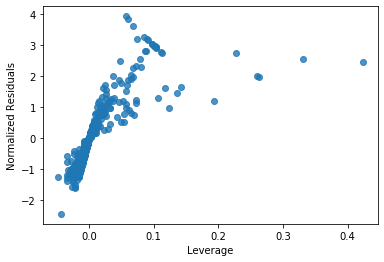

In [133]:
from statsmodels.stats.outliers_influence import OLSInfluence 

leverage = pd.Series(OLSInfluence(result).influence, name="Leverage")
sns.regplot(leverage, resi_n, fit_reg=False)

## 3.6.3 Multiple Linear Regression

In [153]:
#x = lstat & age 
model = smf.ols('medv ~ lstat + age', df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.98e-88
Time:                        16:17:04   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
#x = all columns except 'medv'

x = "+".join(df.columns.difference(['medv']))

model = sm.OLS.from_formula('medv~' + x, df)
result = model.fit()

result.summary()


'age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [156]:
#exclude age and indus: they have very high p-values 
x = "+".join(df.columns.difference(['medv', 'age', 'indus']))
result = smf.ols('medv~'+x, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          5.54e-137
Time:                        16:17:41   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
black          0.0093      0.003      3.475      0.001       0.004       0.015
chas           2.7187      0.854      3.183      0.002       1.040       4.397
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
rad            0.2996      0.063      4.726      0.000       0.175       0.424
rm             3.8016      0.406      9.356      0.000       3.003       4.600
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
zn             0.0458      0.014      3.390      0.001       0.019       0.072
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.4 Interaction Terms

In [168]:
result = smf.ols('medv ~ lstat*age', df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           4.86e-88
Time:                        16:31:17   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

variables = df.loc[:, df.columns != 'medv']

#why add a constant: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
variables = add_constant(variables)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,585.265238,const
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


## 3.6.5 Non-linear Transformations of the Predictors

In [195]:
lm2 = smf.ols('medv~lstat+np.power(lstat, 2)', df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          1.56e-112
Time:                        17:07:33   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
#is this model better than without transformations -- ANOVA

lm = smf.ols('medv ~ lstat', df).fit()
sm.stats.anova_lm(lm, lm2)

#0 represents lm, and 1 represents lm2 - very strong evidence that we should use squared

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


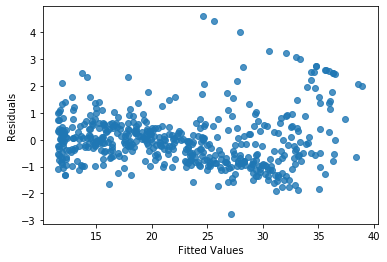

In [202]:
pred = pd.Series(lm2.fittedvalues, name="Fitted Values")
resi = pd.Series(lm2.resid_pearson, name="Residuals")
sns.regplot(pred,resi, fit_reg=False)

In [217]:
#raw polynomial
smf.ols('medv ~ ' + '+'.join(['np.power(lstat,'+str(i)+')' for i in range(1,6)]), df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          8.73e-122
Time:                        18:11:02   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
#orthogonal polynomials - need to look this up in linear algebra
#https://stats.stackexchange.com/questions/258307/raw-or-orthogonal-polynomial-regression
#https://stackoverflow.com/questions/29999900/poly-in-lm-difference-between-raw-vs-orthogonal

def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]


In [225]:
smf.ols('medv ~ poly(lstat, 7)',df).fit().summary()

C:\Users\chocovivs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          8.06e-120
Time:                        18:46:31   Log-Likelihood:                -1549.8
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     498   BIC:                             3149.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5328      0.232     97.168      0.000      22.077      22.988
poly(lstat, 7)[0]  -152.4595      5.216    -29.227      0.000    -162.708    -142.211
poly(lstat, 7)[1]   -64.2272      5.216    -12.313      0.000     -74.476     -53.978
poly(lstat, 7)[2]   -27.0511      5.216     -5.186      0.000     -37.300     -16.802
poly(lstat, 7)[3]    25.4517      5.216      4.879      0.000      15.203      35.701
poly(lstat, 7)[4]    19.2524      5.216      3.691      0.000       9.004      29.501
poly(lstat, 7)[5]    -6.5088      5.216     -1.248      0.213     -16.758       3.740
poly(lstat, 7)[6]     1.9416      5.216      0.372      0.710      -8.307      12.190
==============================================================================
Omnibus:                      146.193   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.269
Skew:                           1.306   Prob(JB):                    2.59e-111
Kurtosis:                       7.163   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
#log transformation 

smf.ols('medv ~ np.log(rm)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.22e-64
Time:                        22:35:20   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.6.6 Qualitative Predictors

In [238]:
df2 = pd.read_csv('Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [239]:
smf.ols('Sales ~ Income:Advertising + Price:Age + ' + "+".join(df2.columns.difference(['Sales'])), df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          6.14e-166
Time:                        23:02:00   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:


from patsy.contrasts import Treatment
var = df2.loc[:,'ShelveLoc']
contrast = Treatment(reference=0).code_without_intercept(var)
print(contrast.matrix)

#https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html

TypeError: 'RangeIndex' object is not callable

In [245]:
df_train = df2.loc[:,'ShelveLoc']
df_train

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object